## Import EDA libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

%matplotlib inline

## Import Datafiles from Consumer Finance Protection Bureau API
#### Consumer_Complaints.csv (full dataset)
#### Consumer_Complaints_with_Consumer_Complaint_Narratives.csv (with text complaints only)

In [2]:
df = pd.read_csv('../data/Consumer_Complaints.csv')
# df = pd.read_csv('../data/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info() #596095 entries, 18 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596096 entries, 0 to 596095
Data columns (total 18 columns):
Date received                   596096 non-null object
Product                         596096 non-null object
Sub-product                     423392 non-null object
Issue                           596094 non-null object
Sub-issue                       232166 non-null object
Consumer complaint narrative    84466 non-null object
Company public response         106682 non-null object
Company                         596096 non-null object
State                           591350 non-null object
ZIP code                        591340 non-null object
Tags                            83897 non-null object
Consumer consent provided?      153914 non-null object
Submitted via                   596096 non-null object
Date sent to company            596096 non-null object
Company response to consumer    596096 non-null object
Timely response?                596096 non-null object
Consumer di

In [4]:
# df.info() #84466 entries, 18 columns

### Checkout each column, just using "df" for now to get the whole scope of data

#### Date Recieved

In [5]:
df['Date received'].value_counts(dropna=False)
# df['Date received'].value_counts(dropna=False).shape #(1688,)
# put date in datetime format
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date

print df['Date received'].min()
print df['Date received'].max()

2011-12-01
2016-07-14


#### Product

In [6]:
df['Product'].value_counts(dropna=False)
# df['Product'].value_counts(dropna=False).shape #(11,)

Mortgage                   195640
Debt collection            109146
Credit reporting           102091
Credit card                 70613
Bank account or service     67155
Consumer Loan               22981
Student loan                16722
Payday loan                  4207
Money transfers              4151
Prepaid card                 2750
Other financial service       640
Name: Product, dtype: int64

#### Sub-product

In [7]:
# df['Sub-product'].value_counts(dropna=False)
# df['Sub-product'].value_counts(dropna=False).shape #(47,)

#### Issue

In [8]:
# df['Issue'].value_counts(dropna=False)
# df['Issue'].value_counts(dropna=False).shape #(96,)

#### Sub-Issue

In [9]:
# df['Sub-issue'].value_counts()
# df['Sub-issue'].value_counts().shape   #(68,)

#### Consumer complaint narrative

In [10]:
# df['Consumer complaint narrative'].value_counts(dropna=False)
# df['Consumer complaint narrative'].value_counts(dropna=False).shape   #(83049,)

#### Company public response

In [11]:
# df['Company public response'].value_counts(dropna=False)
# df['Company public response'].value_counts(dropna=False).shape   #(11,)

#### Company

In [12]:
# df['Company'].value_counts(dropna=False)
# df['Company'].value_counts(dropna=False).shape #(3670,)

#### State


In [13]:
# df['State'].value_counts(dropna=False)
# df['State'].value_counts(dropna=False).shape #(63,)

# Use pyzipcode to find missing zipcodes
# https://pypi.python.org/pypi/pyzipcode

#### ZIP code

In [14]:
# df['ZIP code'].value_counts(dropna=False)
# df['ZIP code'].value_counts(dropna=False).shape #(38066,)

#### Tags

In [15]:
df['Tags'].value_counts(dropna=False)
# df['Tags'].value_counts(dropna=False).shape   #(4,)

NaN                              512199
Older American                    48657
Servicemember                     28393
Older American, Servicemember      6847
Name: Tags, dtype: int64

#### Consumer consent provided?

In [16]:
df['Consumer consent provided?'].value_counts(dropna=False)
# df['Consumer consent provided?'].value_counts(dropna=False).shape #(5,)   

NaN                     442182
Consent provided         84467
Consent not provided     64197
Other                     5246
Consent withdrawn            4
Name: Consumer consent provided?, dtype: int64

#### Submitted via

In [17]:
df['Submitted via'].value_counts()
# df['Submitted via'].value_counts().shape   #(6,)

Web            389903
Referral       114650
Phone           42938
Postal mail     39438
Fax              8820
Email             347
Name: Submitted via, dtype: int64

#### Date sent to company

In [18]:
#df['Date sent to company'].value_counts(dropna=False)
# df['Date sent to company'].value_counts(dropna=False).shape #(1637,)
# put date in datetime format
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

#### Company response to consumer

In [19]:
df['Company response to consumer'].value_counts(dropna=False)
# df['Company response to consumer'].value_counts(dropna=False).shape #(8,)

Closed with explanation            435783
Closed with non-monetary relief     75726
Closed with monetary relief         40631
Closed without relief               17909
Closed                              14225
Closed with relief                   5305
In progress                          3636
Untimely response                    2881
Name: Company response to consumer, dtype: int64

#### Timely Response

In [20]:
df['Timely response?'].value_counts(dropna=False)
# df['Timely response?'].value_counts(dropna=False).shape  #(2,)

Yes    581018
No      15078
Name: Timely response?, dtype: int64

#### Consumer disputed?

In [21]:
df['Consumer disputed?'].value_counts(dropna=False)
# df['Consumer disputed?'].value_counts(dropna=False).shape  #(3,)df['Consumer consent provided?'].value_counts()
# df['Consumer consent provided?'].value_counts().shape   #(4,)

No     439958
Yes    119691
NaN     36447
Name: Consumer disputed?, dtype: int64

#### Complaint ID

In [22]:
#df['Complaint ID'].value_counts(dropna=False)
# df['Complaint ID'].value_counts().shape   #(596096,)

### Initial Plotting

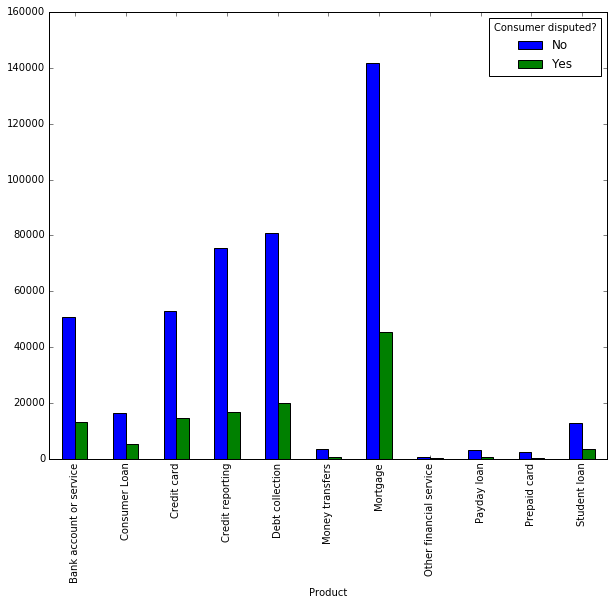

In [23]:
p1 = pd.crosstab(df['Product'], df['Consumer disputed?'])
p1.plot(kind='bar', figsize=(10,8));

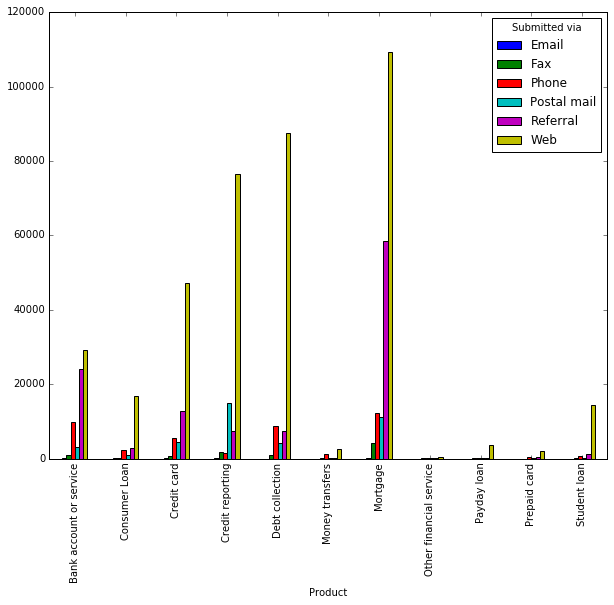

In [24]:
p2 = pd.crosstab(df['Product'], df['Submitted via'])
p2.plot(kind='bar', figsize=(10,8));

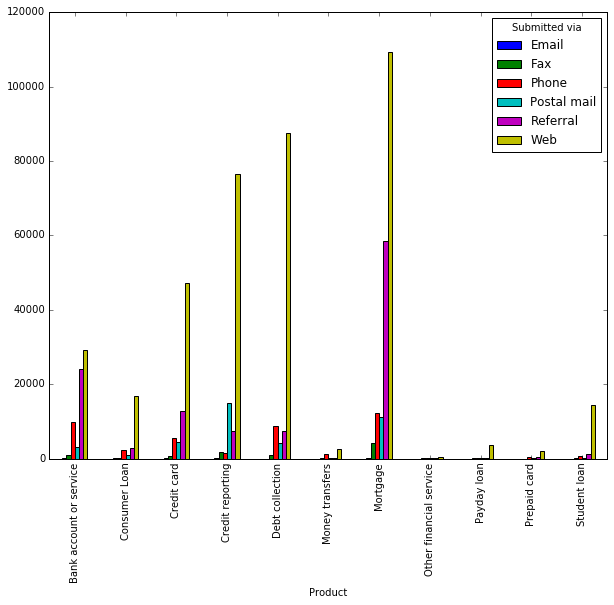

In [25]:
p3 = pd.crosstab(df['Product'], df['Submitted via'])
p3.plot(kind='bar', figsize=(10,8))

In [26]:
p3

Submitted via,Email,Fax,Phone,Postal mail,Referral,Web
Product,,,,,,
Bank account or service,66,932,9955,3028,23966,29208
Consumer Loan,22,254,2229,977,2756,16743
Credit card,43,710,5555,4329,12720,47256
Credit reporting,22,1648,1405,14954,7523,76539
Debt collection,7,990,8830,4301,7400,87618
Money transfers,0,46,1156,99,170,2680
Mortgage,176,4112,12360,11294,58384,109314
Other financial service,1,16,93,63,126,341
Payday loan,0,23,272,53,126,3733


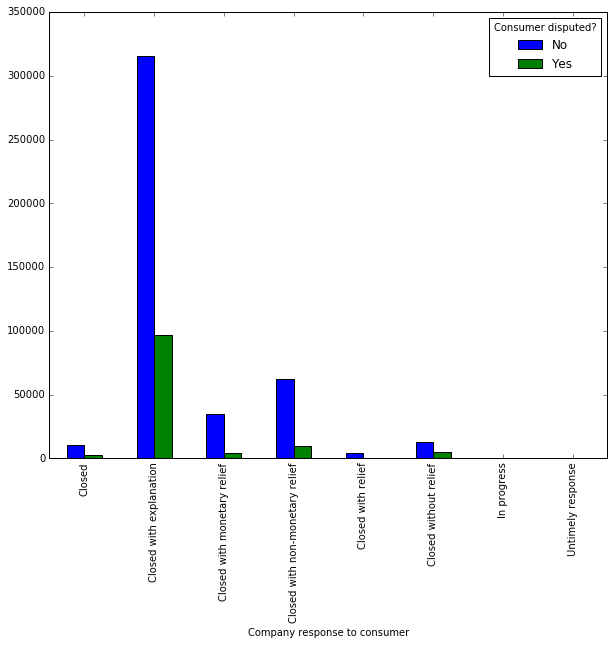

In [27]:
p4 = pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])
p4.plot(kind='bar', figsize=(10,8))

In [28]:
p4

Consumer disputed?,No,Yes
Company response to consumer,,
Closed,10398,3065
Closed with explanation,315480,97131
Closed with monetary relief,34490,4434
Closed with non-monetary relief,62111,9494
Closed with relief,4515,714
Closed without relief,12962,4851
In progress,2,0
Untimely response,0,2


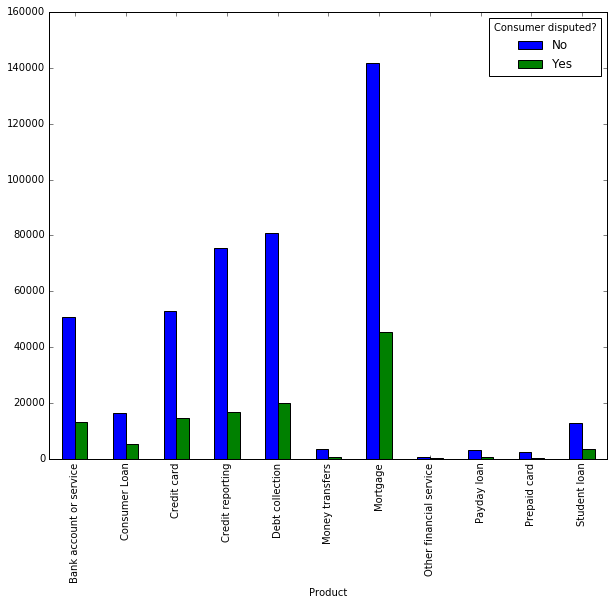

In [30]:
p5 = pd.crosstab(df['Product'], df['Consumer disputed?'])
p5.plot(kind='bar',figsize=(10,8))

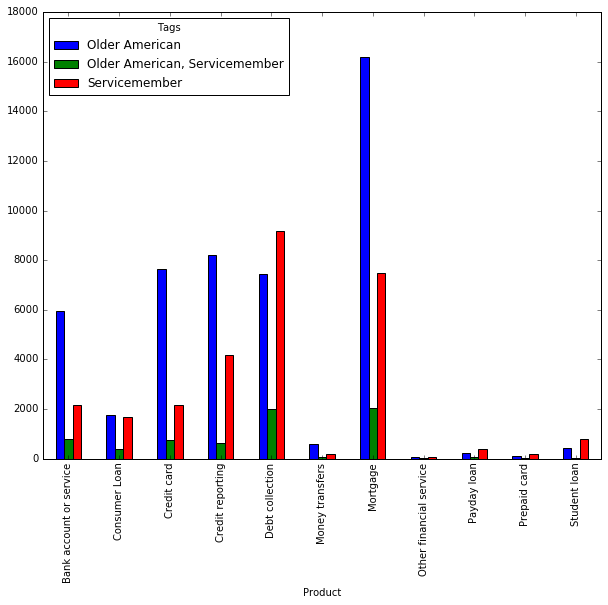

In [31]:
p6 = pd.crosstab(df['Product'], df['Tags'])
p6.plot(kind='bar',figsize=(10,8))

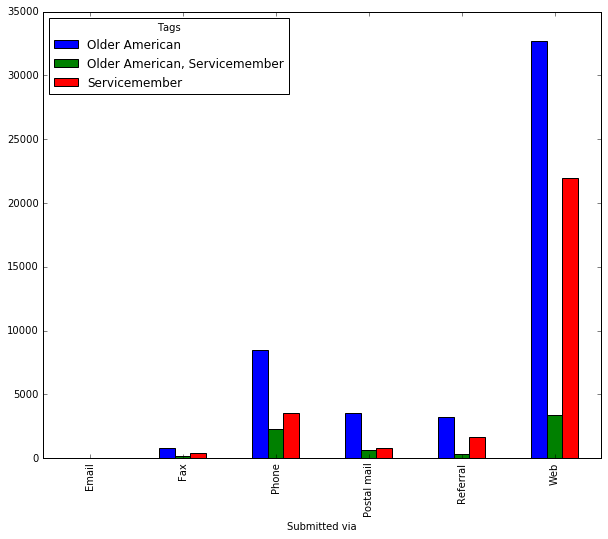

In [32]:
p7 = pd.crosstab(df['Submitted via'], df['Tags'])
p7.plot(kind='bar',figsize=(10,8))

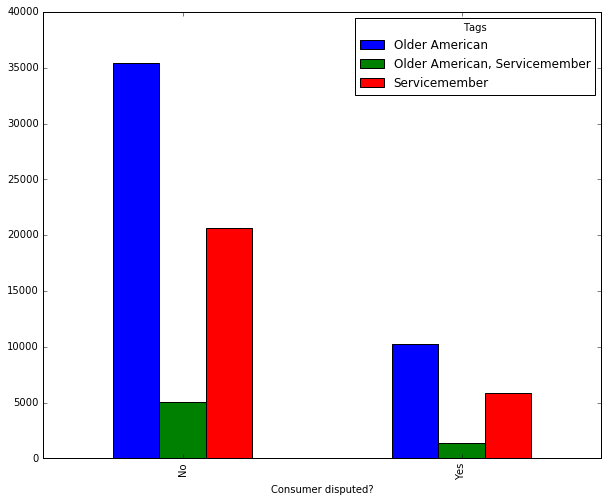

In [33]:
p8 = pd.crosstab(df['Consumer disputed?'], df['Tags'])
p8.plot(kind='bar',figsize=(10,8))

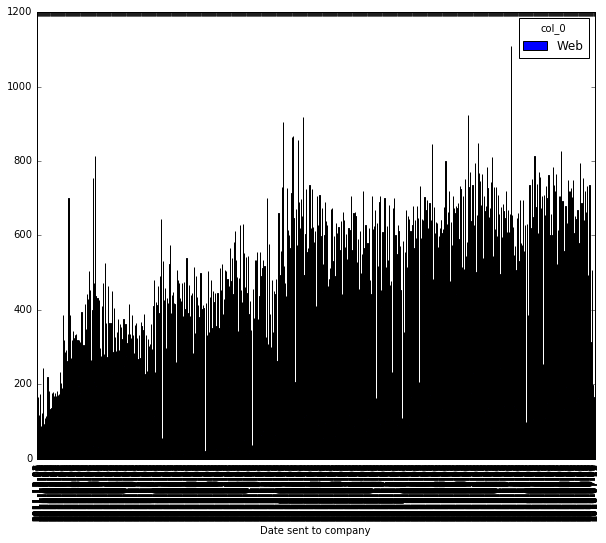

In [34]:
p9 = pd.crosstab(df['Date sent to company'], df['Submitted via'][5])
# p9
p9.plot(kind='bar',figsize=(10,8))
#  Crappy plot, but shows that web is on the increase

## Manage missing values

In [35]:
df['Product'].fillna('Not Provided', inplace=True)
df['Sub-product'].fillna('Not Provided', inplace=True)
df['Sub-issue'].fillna('Not Provided', inplace=True)
df['Issue'].fillna('Not Provided', inplace=True)
df['Consumer complaint narrative'].fillna('Not Provided', inplace=True)
df['Company public response'].fillna('Not Provided', inplace=True)
df['Company'].fillna('Not Provided', inplace=True)
df['State'].fillna('Not Provided', inplace=True)
df['ZIP code'].fillna('Not Provided', inplace=True)
df['Tags'].fillna('Not Provided', inplace=True)
df['Consumer consent provided?'].fillna('Not Provided', inplace=True)
df['Submitted via'].fillna('Not Provided',inplace=True) 
df['Consumer disputed?'].fillna('Not Provided', inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596096 entries, 0 to 596095
Data columns (total 18 columns):
Date received                   596096 non-null object
Product                         596096 non-null object
Sub-product                     596096 non-null object
Issue                           596096 non-null object
Sub-issue                       596096 non-null object
Consumer complaint narrative    596096 non-null object
Company public response         596096 non-null object
Company                         596096 non-null object
State                           596096 non-null object
ZIP code                        596096 non-null object
Tags                            596096 non-null object
Consumer consent provided?      596096 non-null object
Submitted via                   596096 non-null object
Date sent to company            596096 non-null object
Company response to consumer    596096 non-null object
Timely response?                596096 non-null object
Consumer 

### Need to modify 'Consumer consent provided?' to have binary-ish response.
#### Assume 'Consent withdrawn' and 'Other' are equivalent to 'Consent not provided'

In [37]:
df['Consumer consent provided?'].value_counts()
#For a reminder of what is in there

Not Provided            442182
Consent provided         84467
Consent not provided     64197
Other                     5246
Consent withdrawn            4
Name: Consumer consent provided?, dtype: int64

In [38]:
df['Consumer consent provided?'] = df['Consumer consent provided?'].apply(lambda x: 
        'Consent not provided' if x=='Other' or x=='Consent withdrawn'
         or x=='Not Provided' else x)

In [39]:
df['Consumer disputed?'].value_counts()

No              439958
Yes             119691
Not Provided     36447
Name: Consumer disputed?, dtype: int64

### Need to modify "Consumer disputed?" to have binary-ish response
#### Assume "Not Provided" = "No"

In [40]:
df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: 
        'No' if x=='Not Provided' else x)

In [41]:
df['Consumer disputed?'].value_counts()


No     476405
Yes    119691
Name: Consumer disputed?, dtype: int64

In [42]:
# crosstab of consent provided vs disputed
consent_provided_v_disputed = pd.crosstab(df['Consumer consent provided?'], df['Consumer disputed?'])

In [43]:
consent_provided_v_disputed
#  Print crosstab table

Consumer disputed?,No,Yes
Consumer consent provided?,,
Consent not provided,411638,99991
Consent provided,64767,19700


In [44]:
#  Convert to 1/0 for labels binary response
replace_Y_N_to_1_zero = {'Yes': True, 'No':False}
df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: replace_Y_N_to_1_zero[x])

In [45]:
df['Consumer disputed?'].value_counts()

False    476405
True     119691
Name: Consumer disputed?, dtype: int64

### Fill in missing state zipcodes using pyzipcode (link above)

In [46]:
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()

for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

#### Check to see if all ZIP codes are filled

In [47]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape #4713

(0, 18)

In [48]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [49]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape #0

(0, 18)

## Feature Engineering/Additional EDA

#### Add count of company complaints (total) for each company

In [50]:
count_company_complaints = df['Company'].value_counts()
df['Count of Company Complaints'] = df['Company'].apply(lambda x: count_company_complaints[x])

### Create numerical date features

In [51]:
# df['Recieved Year'] = df['Date received'].apply(lambda x: x.year)
# df['Recieved Month'] = df['Date received'].apply(lambda x: x.month)
# df['Recieved Day'] = df['Date received'].apply(lambda x: x.day)

# df['Submitted Year'] = df['Date sent to company'].apply(lambda x: x.year)
# df['Submitted Month'] = df['Date sent to company'].apply(lambda x: x.month)
# df['Submitted Day'] = df['Date sent to company'].apply(lambda x: x.day)

### Create Label from "Company response to consumer".  Needs to be numerical.

In [52]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            435783
Closed with non-monetary relief     75726
Closed with monetary relief         40631
Closed without relief               17909
Closed                              14225
Closed with relief                   5305
In progress                          3636
Untimely response                    2881
Name: Company response to consumer, dtype: int64

In [53]:
# Filter out "Not Provided"
df = df[df['Consumer complaint narrative'] != 'Not Provided']

In [54]:
# Filter out "In progress"
df = df[df['Company response to consumer'] != 'In progress']

In [55]:
df['Company response to consumer'].value_counts(dropna=False)
# df.shape

Closed with explanation            64498
Closed with non-monetary relief    10882
Closed with monetary relief         6150
Closed                              2146
Untimely response                    790
Name: Company response to consumer, dtype: int64

#### Create dict to repalce 7 leftover categories with numbers for classificaiton

In [56]:
cust_resp_dict ={'Closed':0,
                 'Untimely response':0,
                 'Closed without relief':1,
                 'Closed with explanation':1,
                 'Closed with relief':2,
                 'Closed with non-monetary relief':2,
                 'Closed with monetary relief':2}
#  Trying as 1 and 0 insteand of 0, 1, 2 for more simple classification.

In [57]:
df['Company response to consumer'] = df['Company response to consumer'].apply(lambda x: cust_resp_dict[x])

In [58]:
df['Company response to consumer'].value_counts(dropna=False)


1    64498
2    17032
0     2936
Name: Company response to consumer, dtype: int64

In [59]:
# df['Date received']

## Create "model_data" DF for modeling

In [60]:
model_data = pd.DataFrame()

## Assign categorical values numerical values

In [61]:
feature_for_model=['Product', 'Sub-product','Issue','Sub-issue','Tags', 'State', 'Submitted via']

for name in feature_for_model:
    val ={}
    i=0
    for value in df[name].unique(): 
        val[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: val[x])
    model_data[name] = df[name].astype('category')

In [62]:
model_data.head()

,Product,Sub-product,Issue,Sub-issue,Tags,State,Submitted via
57978,0,0,0,0,0,0,0
58036,1,1,1,1,0,1,0
58087,0,0,2,0,0,2,0
58097,2,0,3,2,0,3,0
58101,1,2,1,3,0,4,0


In [63]:
compl_v_resp = pd.crosstab(df['Count of Company Complaints'], df['Company response to consumer'])

In [64]:
compl_v_resp.head()

Company response to consumer,0,1,2
Count of Company Complaints,,,
1,44,137,27
2,44,149,23
3,52,135,23
4,49,113,28
5,36,127,27


In [65]:
compl_v_resp['Non-Relief Rate'] = compl_v_resp[0] / (compl_v_resp[0] + compl_v_resp[1])# + compl_v_resp[2])

In [66]:
compl_v_resp['Relief Rate'] = compl_v_resp[1] / (compl_v_resp[0] + compl_v_resp[1] )#+ compl_v_resp[2]) was [2] in num

In [67]:
compl_v_resp.describe()

Company response to consumer,0,1,2,Non-Relief Rate,Relief Rate
count,345.000000,345.000000,345.000000,345.000000,345.000000
mean,8.510145,186.950725,49.368116,0.077733,0.922267
std,18.049690,495.795644,198.212303,0.148026,0.148026
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,0.901408
50%,1.000000,74.000000,5.000000,0.006803,0.993197
75%,10.000000,124.000000,19.000000,0.098592,1.000000
max,152.000000,5091.000000,2310.000000,1.000000,1.000000


In [68]:
compl_v_resp.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            13974, 16481, 21808, 27674, 28475, 34129, 35640, 35730, 44080,
            58108],
           dtype='int64', name=u'Count of Company Complaints', length=345)

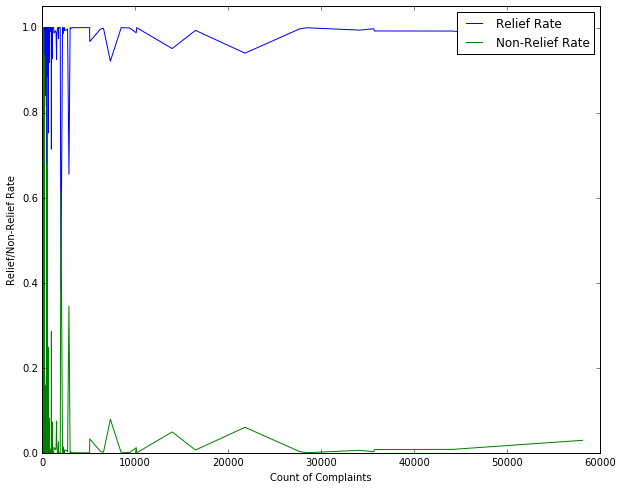

In [69]:
fig = plt.figure(figsize=(10,8))
plt.plot(compl_v_resp['Relief Rate'])
plt.plot(compl_v_resp['Non-Relief Rate'])

plt.xlim([0.0, 60000])
plt.ylim([0.0, 1.05])
plt.xlabel('Count of Complaints')
plt.ylabel('Relief/Non-Relief Rate')
#plt.title()
plt.legend(loc="upper right")
plt.show()

# Looks bad using 1/0 for releif sorting...  

In [70]:
day_sent = df['Date sent to company'].apply(lambda x: x.day)
month_sent = df['Date sent to company'].apply(lambda x: x.month)
year_sent = df['Date sent to company'].apply(lambda x: x.year)

In [71]:
month_v_resp = pd.crosstab(month_sent, df['Company response to consumer'])

In [72]:
month_v_resp['Non-Relief Rate'] = compl_v_resp[0] / (compl_v_resp[0] + compl_v_resp[1])# + compl_v_resp[2])
month_v_resp['Relief Rate'] = compl_v_resp[1] / (compl_v_resp[0] + compl_v_resp[1] )#+ compl_v_resp[2]) was [2] in num

In [73]:
month_v_resp.head()

Company response to consumer,0,1,2,Non-Relief Rate,Relief Rate
Date sent to company,,,,,
1,207,4342,981,0.243094,0.756906
2,228,4356,1047,0.227979,0.772021
3,283,6303,1642,0.278075,0.721925
4,396,8686,2240,0.302469,0.697531
5,326,7613,2038,0.220859,0.779141


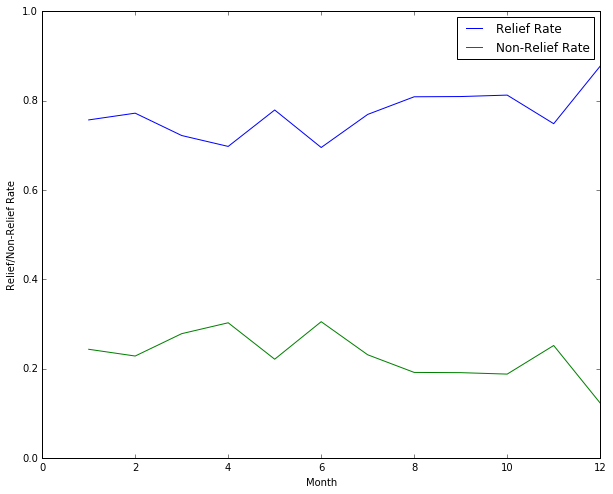

In [78]:
fig = plt.figure(figsize=(10,8))
plt.plot(month_v_resp.index,month_v_resp['Relief Rate'])
plt.plot(month_v_resp.index,month_v_resp['Non-Relief Rate'])

plt.xlim([0.0, 12])
plt.ylim([0.0, 1.0])
plt.xlabel('Month')
plt.ylabel('Relief/Non-Relief Rate')
#plt.title('')
plt.legend(loc="upper right")
plt.show()

In [79]:
state_v_resp = pd.crosstab(df['State'], df['Company response to consumer'])
state_v_resp['Relief Rate'] = compl_v_resp[0] / (compl_v_resp[0] + compl_v_resp[1])# + compl_v_resp[2])
state_v_resp['Non-Relief Rate'] = compl_v_resp[1] / (compl_v_resp[0] + compl_v_resp[1] )#+ compl_v_resp[2]) was [2] in num

In [80]:
# state_v_resp

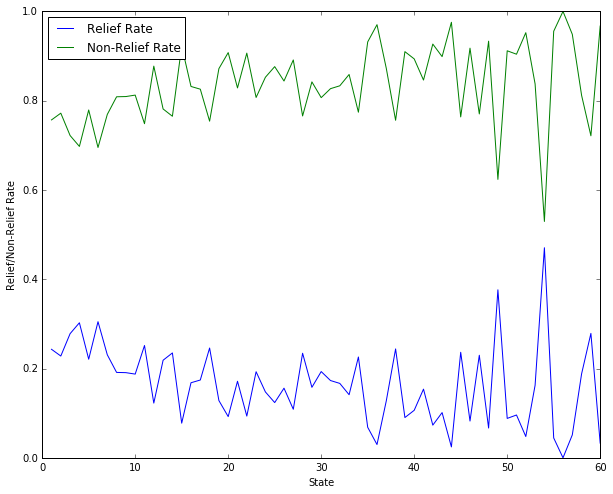

In [81]:
fig = plt.figure(figsize=(10,8))
plt.plot(state_v_resp.index,state_v_resp['Relief Rate'])
plt.plot(state_v_resp.index,state_v_resp['Non-Relief Rate'])

plt.xlim([0.0, 60])
plt.ylim([0.0, 0.6])
plt.xlabel('State')
plt.ylabel('Relief/Non-Relief Rate')
# plt.title('')
plt.legend(loc="upper left")
plt.show()

In [82]:
df['Submitted via'].value_counts()

0    84466
Name: Submitted via, dtype: int64

In [83]:
submit_v_resp = pd.crosstab(df['Submitted via'], df['Company response to consumer'])
submit_v_resp['Relief Rate'] = submit_v_resp[0] /(submit_v_resp[0] + submit_v_resp[1] + submit_v_resp[2])
submit_v_resp['Non-Relief Rate'] = submit_v_resp[2] /(submit_v_resp[0] + submit_v_resp[1] + submit_v_resp[2])
# DOESNT WORK HERE SILLY, you've got to submit via web to add a customer narrative, or get a text response 

In [84]:
submit_v_resp

Company response to consumer,0,1,2,Relief Rate,Non-Relief Rate
Submitted via,,,,,
0,2936,64498,17032,0.03476,0.201643


In [85]:
# fig = plt.figure(figsize=(10,8))
# plt.plot(submit_v_resp.index,submit_v_resp['Relief Rate'])
# plt.plot(submit_v_resp.index,submit_v_resp['Non-Relief Rate'])

# plt.xlim([0.0, 60])
# plt.ylim([0.0, 6])
# plt.xlabel('Submitted via')
# plt.ylabel('Relief/Non-Relief Rate')
# # plt.title('')
# plt.legend(loc="upper left")
# plt.show()

# STATISTICAL CHECKS

### Distribution of labels

In [86]:
labels = df['Company response to consumer'].value_counts()
labels
# 1    6449  # 76.34% 1 - Closed w/Explanation
# 2    17032 # 20.11% 2 - Closed w/Relief, Closed w/non-monetary relief, Close w/monetary relief
# 0     2936 # 3.48%  0 - Untimley Response, Closed w/o Relief, Closed

# 'Closed':0,
#                  'Untimely response':0,
#                  'Closed without relief':0,
#                  'Closed with explanation':1,
#                  'Closed with relief':2,
#                  'Closed with non-monetary relief':2,
#                  'Closed with monetary relief':2}

1    64498
2    17032
0     2936
Name: Company response to consumer, dtype: int64

# MODELING

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize, MaxAbsScaler
from sklearn.cross_validation import train_test_split

import sklearn.metrics as skm
from sklearn.metrics import roc_curve, auc

from scipy import interp

from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Non-Text Features

In [88]:
X = model_data.values
y_start = df['Company response to consumer']
y = label_binarize(y_start, classes = [0, 1, 2])
n_classes = 2
y_start.shape

(84466,)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [90]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train.shape
y_train.shape

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(59126, 3)

#### Using One v Rest classifier to predict each class against the other with NB

In [91]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto'))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

In [92]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_score[:, i],drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

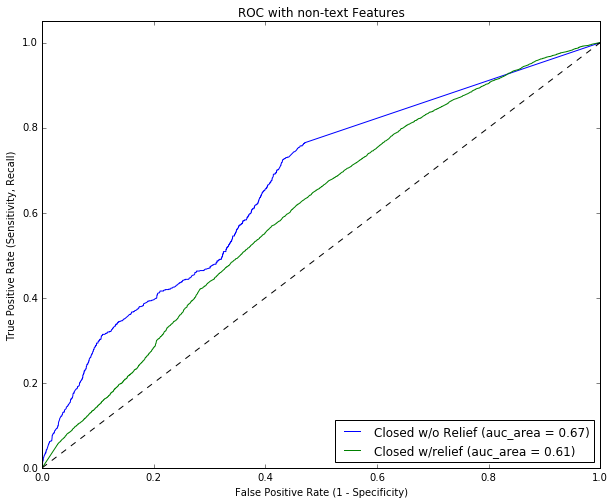

In [93]:
fig = plt.figure(figsize=(10, 8))

label = ['Closed w/o Relief', 'Closed w/relief']  #'Closed w/explaination',
for i,v in enumerate(label):
    plt.plot(fpr[i], tpr[i], label= v + ' (auc_area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity, Recall)')
plt.title('ROC with non-text Features')
plt.legend(loc="lower right")


plt.show()

#### Random Forest

In [94]:
rfc = RandomForestClassifier(n_estimators=750, n_jobs=-1, class_weight='auto')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
def feat_importance(clf, X, max_features=10):
    '''Plot Feature Importance'''
    feature_importance = clf.feature_importances_
    
    # Make importances rel to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top XX features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Non-Text Feature Importance')
    
    plt.show()

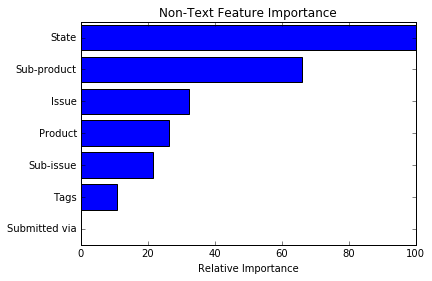

In [96]:
feat_importance(rfc, model_data, max_features=10)

## Logistic Regression


In [97]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

ValueError: bad input shape (59126, 3)

In [98]:
v_probs = lr.predict_proba(X_test)[:, 1]

NotFittedError: Call fit before prediction

In [99]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y_test, title, xlabel, ylabel):
    # ROC
    fig = plt.figure(figsize = (8,6))
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)
    
    import sklearn.metrics as skm
    auc = skm.roc_auc_score(y_test, v_probs)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, 'k--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    fig.savefig(title+'.png')

In [100]:
model_data
X = model_data.values
y_start = df['Company response to consumer'].values

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y_start, test_size=0.3, random_state=11)

In [102]:
plot_roc(v_probs, y_test, "ROC plot", "False Positive Rate (1 - Specificity)", 
         "True Positive Rate (Sensitivity, Recall)")

NameError: name 'v_probs' is not defined

# USE TEXT FEATURES

In [103]:
df_words = pd.read_csv('../data/Consumer_Complaints.csv')
#df_txt = pd.read_csv('../data/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv')

In [104]:
df_words.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [105]:
words_DF = df_words.drop(df.columns[[1, 69]], axis=1, inplace=True)


IndexError: index 69 is out of bounds for axis 1 with size 19

In [106]:
df_words['Product'].fillna('Not Provided', inplace=True)
df_words['Sub-product'].fillna('Not Provided', inplace=True)
df_words['Sub-issue'].fillna('Not Provided', inplace=True)
df_words['Issue'].fillna('Not Provided', inplace=True)
df_words['Consumer complaint narrative'].fillna('Not Provided', inplace=True)
df_words['Company public response'].fillna('Not Provided', inplace=True)
df_words['Company'].fillna('Not Provided', inplace=True)
df_words['State'].fillna('Not Provided', inplace=True)
df_words['ZIP code'].fillna('Not Provided', inplace=True)
df_words['Tags'].fillna('Not Provided', inplace=True)
df_words['Consumer consent provided?'].fillna('Not Provided', inplace=True)
df_words['Submitted via'].fillna('Not Provided',inplace=True) 
df_words['Consumer disputed?'].fillna('Not Provided', inplace=True)

In [107]:
#  Remove XXX's in data where personal info has been removed
chars_to_remove = ['XX', 'XXX', 'XXXX']
df_words['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: x.translate(None, ''.join(chars_to_remove)))

In [108]:
X_word = df_words['Consumer complaint narrative'].values
y = df['Company response to consumer'].values

y = label_binarize(y, classes=[0, 1, 2])
n_classes = 3

X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y, test_size=0.30, random_state=11)
vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, min_df=0.001, max_df = 0.2,
                             )
words_matrix_train =vectorizer.fit_transform(X_train_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix = vectorizer.transform(X_word)

ValueError: Found arrays with inconsistent numbers of samples: [ 84466 596096]

In [109]:
nbc = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto'),n_jobs=-1)
y_score = nbc.fit(words_matrix_train, y_train).predict_proba(words_matrix_test)

NameError: name 'words_matrix_train' is not defined

In [110]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

IndexError: too many indices for array

In [111]:
fig = plt.figure(figsize=(8,6))

label = ['Closed w/o Relief', 'Closed w/explaination', 'Closed w/relief']
for i,v in enumerate(label):
    plt.plot(fpr[i], tpr[i], label= v + ' (auc_area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity, Recall)')
plt.title('ROC with non-text Features')
plt.legend(loc="lower right")


plt.show()

KeyError: 0